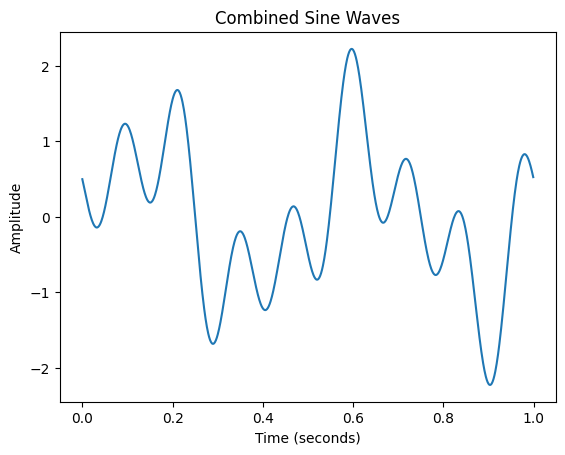

Combined signal shape: (1000,)
Sampling rate: 1000


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def combine_specific_sine_waves(sine_wave_parameters, duration=1, sampling_rate=1000):
    """
    Combine specific sine waves into a NumPy array, plot the result, and return the combined wave and sampling rate.

    Parameters:
    - sine_wave_parameters (list of tuples): Parameters for each sine wave (frequency, amplitude, phase).
    - duration (float): Duration of the signal in seconds.
    - sampling_rate (int): Sampling rate in Hz.

    Returns:
    - np.ndarray: Combined sine waves as a NumPy array.
    - int: Sampling rate.
    """
    time = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

    combined_wave = np.zeros_like(time)

    for frequency, amplitude, phase in sine_wave_parameters:
        sine_wave = amplitude * np.sin(2 * np.pi * frequency * time + phase)
        combined_wave += sine_wave

    plt.plot(time, combined_wave)
    plt.title("Combined Sine Waves")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    plt.show()

    return combined_wave, sampling_rate

# Example usage:
sine_wave_parameters = [
    (2, 1.0, 0),   # Frequency, amplitude, phase for the first sine wave
    (5, 0.5, np.pi/2),  # Frequency, amplitude, phase for the second sine wave
    (8, 0.8, np.pi)  # Frequency, amplitude, phase for the third sine wave
]

combined_signal, sampling_rate = combine_specific_sine_waves(sine_wave_parameters)
print("Combined signal shape:", combined_signal.shape)
print("Sampling rate:", sampling_rate)


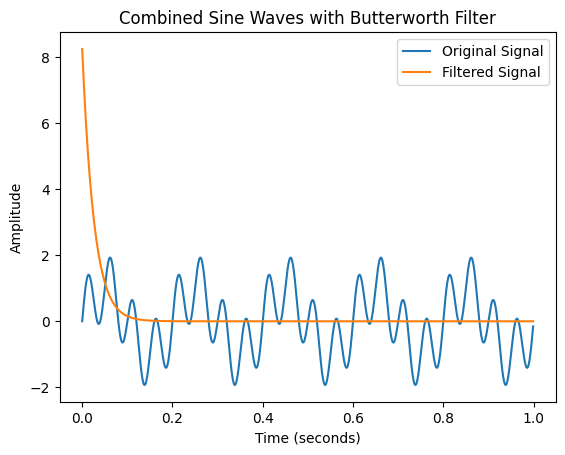

In [2]:
from scipy.signal import butter, lfilter, filtfilt
import scipy.signal as signal
import numpy as np
import matplotlib.pyplot as plt

def butterworth_bandpass(lowcut, highcut, sr, order=5):
    nyquist = 0.5 * sr
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band', fs=sr)
    return b, a

def apply_butterworth_filter(data, b, a):
    """
    Applies a butterworth filter from the filter coefficients
    on a multi-channel input.

    Args:
        data (2D array): multi-channel input
        b, a (ndarrays): filter coefficients

    Returns:
        filtered_data (2D array): data passed through the butterworth
                                    filter
    """
    num_channels = data.shape[0]
    num_samples = data.shape[1]

    filtered_data = np.zeros_like(data)  # Initialize with zeros

    for i in range(num_channels):
        filtered_data[i, :] = filtfilt(b, a, data[i, :])
        
    return filtered_data


# Generate a test signal (sine wave)
sampling_rate = 1000
duration = 1
time = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
combined_signal = np.sin(2 * np.pi * 5 * time) + np.sin(2 * np.pi * 20 * time)

# Reshape the signal to be a 2D array (1 channel)
combined_signal = combined_signal.reshape(1, -1)

# Apply Butterworth filter
b, a = butterworth_bandpass(4, 6, sampling_rate)
# new_combined = apply_butterworth_filter(combined_signal, b, a)
new_combined = signal.filtfilt(b, a, combined_signal)

# Plot the original and filtered signals
plt.plot(time, combined_signal.flatten(), label='Original Signal')
plt.plot(time, new_combined.flatten(), label='Filtered Signal')
plt.title("Combined Sine Waves with Butterworth Filter")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


(1000,)


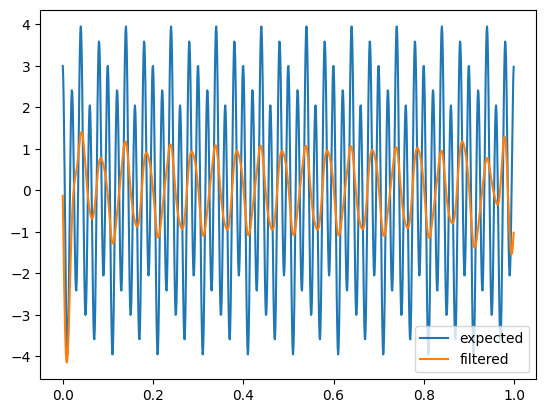

In [6]:

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

fs = 1000  # Sampling frequency
# Generate the time vector properly
t = np.arange(1000) / fs
signala = np.sin(2*np.pi*100*t) # with frequency of 100
# plt.plot(t, signala, label='a')

signalb = 1*np.sin(2*np.pi*20*t+np.pi) # frequency 20
# plt.plot(t, signalb, label='b')

signalc = 3*np.sin(2*np.pi*50*t+np.pi/2) # frequency 50
# plt.plot(t, signalb, label='c')

signal_all = signala + signalb + signalc
# plt.plot(t, signal_all, label='all')

signal_filt = signalb + signalc
plt.plot(t, signal_filt, label='expected')

w_l = 10 / (fs / 2) # Normalize the frequency
w_h = 40 / (fs / 2)
b, a = signal.butter(5, [w_l, w_h], 'band')
print(signal_all.shape)
output = signal.filtfilt(b, a, signal_all)
plt.plot(t, output, label='filtered')
plt.legend()
plt.show()